In this code, first, a class named "NeuralNetwork" is defined to represent a neural network model. The class is initialized with the sizes of each layer in the network. The initial weights and biases are set to None.

A method named "set_initial_parameters" is defined to manually set the initial weights and biases of the neural network.

The "forward" method implements forward propagation through the neural network. It calculates the activations of each layer based on the input data, using the tanh activation function for hidden layers and the sigmoid activation function for the output layer.

The "backward" method implements backward propagation through the neural network. It calculates the errors and gradients for each layer, updating the weights and biases using gradient descent.

The "train" method trains the neural network using forward and backward propagation. It initializes the training process, calculates the initial loss, and iterates over multiple epochs to update the weights and biases.

The "predict" method predicts output labels based on input data using the trained neural network.

The "plot_decision_boundary" method plots the decision boundary of the trained neural network based on input data and labels.

The neural network architecture consists of four layers: two hidden layers with two neurons each and one output layer with one neuron.

Initial weights and biases are manually defined based on the provided values.

The network is trained using a Mean Squared Error (MSE) loss function and stochastic gradient descent (SGD) optimization algorithm.

After training the network, the model is evaluated with the training data.

Using the trained model, predictions are made for the training data, and the decision boundary is plotted to visualize the model's performance.

Initial Weights and Biases:
Layer 1 Weights:
[[ 0.99866709 -0.2475153 ]
 [ 0.49787811 -0.99832149]]
Layer 1 Biases:
[[-0.00069405  0.00054645]]
Layer 2 Weights:
[[ 1.99933915  0.25064548]
 [-1.49942902  0.99949087]]
Layer 2 Biases:
[[-3.94794492e-05  5.20688377e-05]]
Layer 3 Weights:
[[-0.99952943]
 [ 0.49981319]]
Layer 3 Biases:
[[3.1793513e-05]]


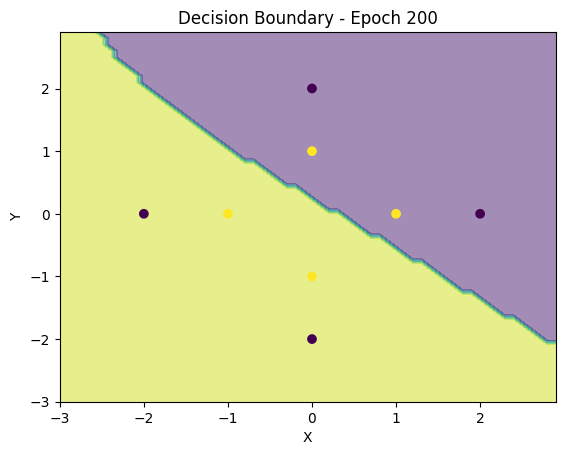

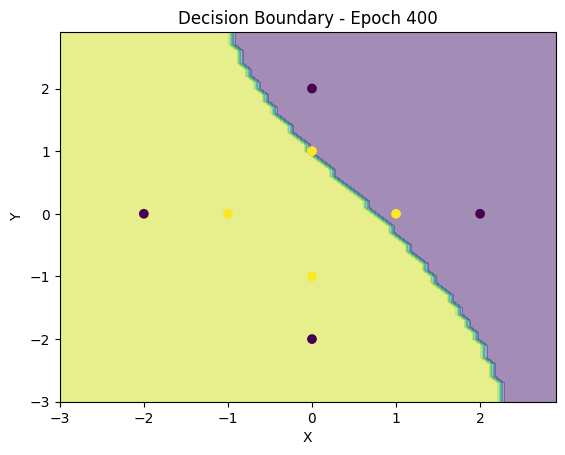

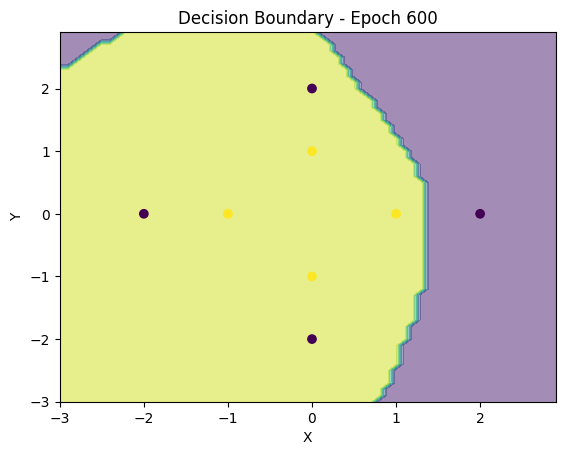

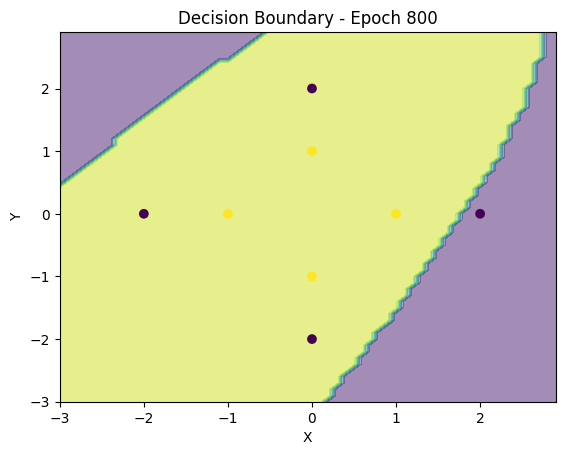

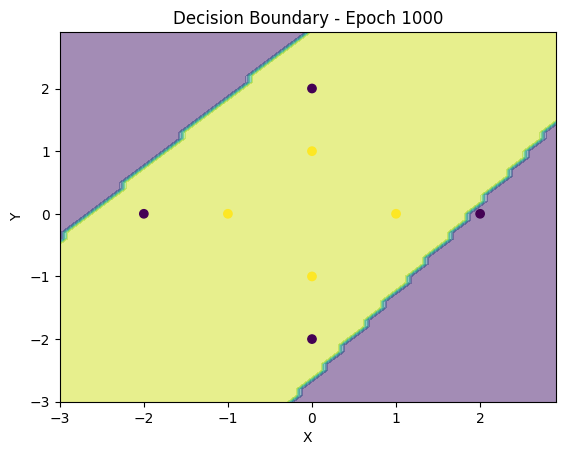

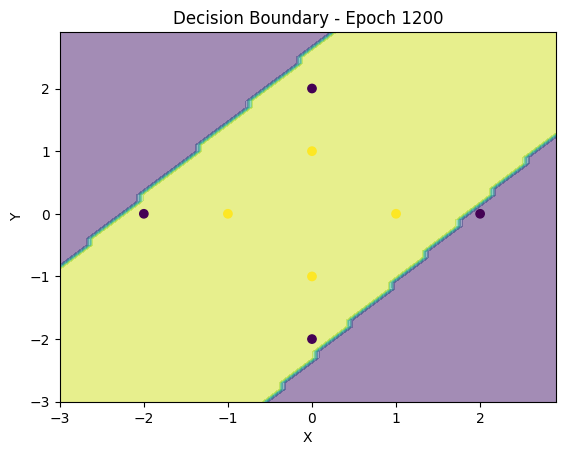

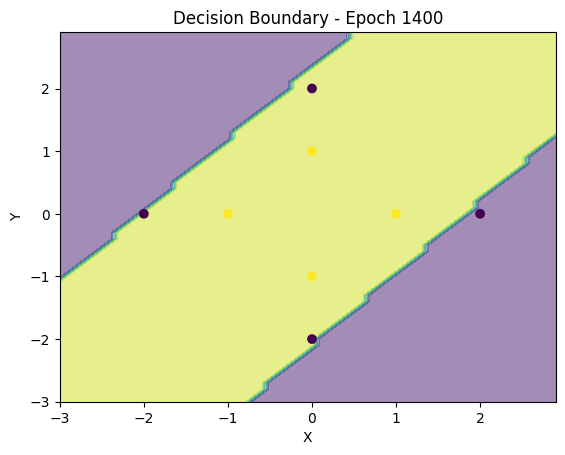

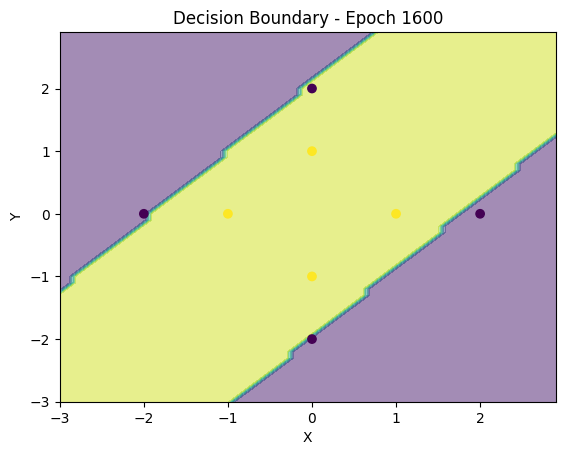

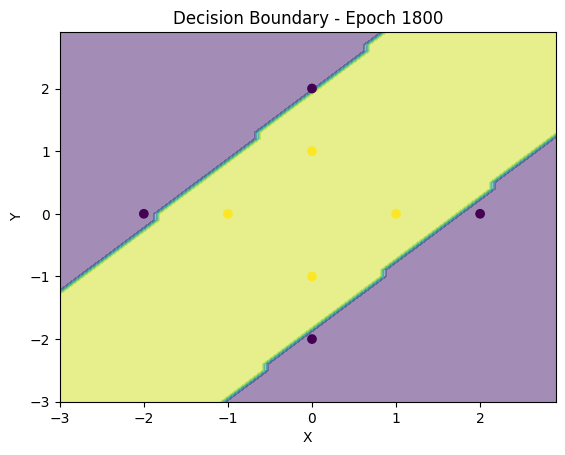

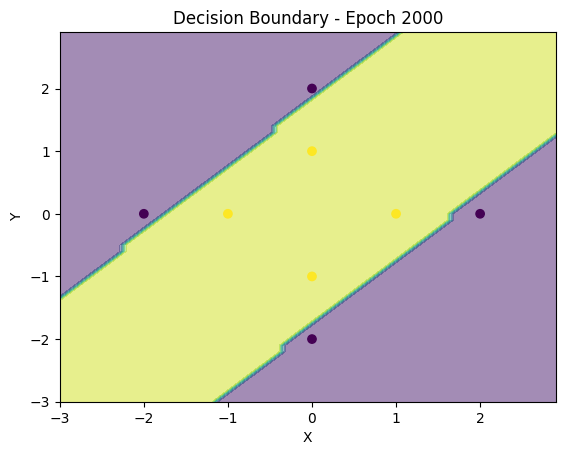


Final Weights:
Layer 1 Weights:
[[ 0.61374369  0.59818515]
 [-0.58383079 -0.56840895]]
Layer 2 Weights:
[[ 2.00175495  0.24610197]
 [-1.52376464  1.00972866]]
Layer 3 Weights:
[[-1.04608344]
 [ 0.50976773]]


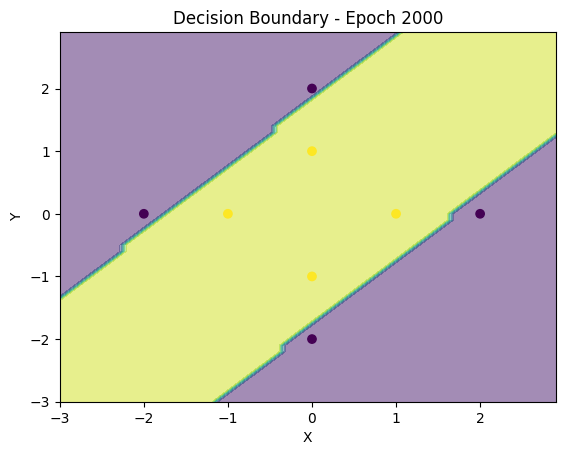

In [7]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

# define neural network class
class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = [None] * (self.num_layers - 1)  # Initialize weights with None
        self.biases = [None] * (self.num_layers - 1)  # Initialize biases with None

    def set_initial_parameters(self, weights, biases): # define a function to set initial weights and biases
        for i in range(self.num_layers - 1):
            self.weights[i] = weights[i]
            self.biases[i] = biases[i]

    # define forward layers
    def forward(self, X):
        self.activations = [X]
        self.z_values = []

        for i in range(self.num_layers - 1):
            z = np.dot(self.activations[-1], self.weights[i]) + self.biases[i]
            self.z_values.append(z)
            if i < self.num_layers - 2:
                a = self.tanh(z)
            else:
                a = self.sigmoid(z)
            self.activations.append(a)

        return self.activations[-1]

    # define backward and errors
    def backward(self, X, y, learning_rate):
        self.errors = [y - self.activations[-1]]
        self.gradients = []

        for i in range(self.num_layers - 2, -1, -1):
            if i < self.num_layers - 2:
                gradient = self.errors[-1] * self.tanh_derivative(self.activations[i + 1])
            else:
                gradient = self.errors[-1] * self.sigmoid_derivative(self.activations[i + 1])
            self.gradients.append(gradient)

            error = np.dot(self.errors[-1], self.weights[i].T)
            self.errors.append(error)

        self.errors.reverse()
        self.gradients.reverse()

        for i in range(self.num_layers - 1):
            self.weights[i] += learning_rate * np.dot(self.activations[i].T, self.gradients[i])
            self.biases[i] += learning_rate * np.sum(self.gradients[i], axis=0)

    # define training
    def train(self, X, y, learning_rate, epochs, plot_interval=None):
        self.loss_history = []

        # First epoch of training
        self.forward(X)
        self.backward(X, y, learning_rate)
        loss = np.mean((y - self.activations[-1]) ** 2)
        self.loss_history.append(loss)

        # Report initial weights and biases
        print("Initial Weights and Biases:")
        for i in range(self.num_layers - 1):
            print(f"Layer {i + 1} Weights:\n{self.weights[i]}")
            print(f"Layer {i + 1} Biases:\n{self.biases[i]}")

        # Subsequent epochs
        for epoch in range(2, epochs + 1):
            self.forward(X)
            self.backward(X, y, learning_rate)
            loss = np.mean((y - self.activations[-1]) ** 2)
            self.loss_history.append(loss)

            if plot_interval and epoch % plot_interval == 0:
                self.plot_decision_boundary(X, y, epoch)

        # Report final weights
        print("\nFinal Weights:")
        for i in range(self.num_layers - 1):
            print(f"Layer {i + 1} Weights:\n{self.weights[i]}")

        # Plot decision boundary after final epoch
        self.plot_decision_boundary(X, y, epochs)

    def predict(self, X):
        return np.round(self.forward(X))

    def tanh(self, x):
        return np.tanh(x)

    def tanh_derivative(self, x):
        return 1 - np.tanh(x) ** 2

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    def plot_decision_boundary(self, X, y, epoch):
        plt.figure()
        plt.title(f'Decision Boundary - Epoch {epoch}')
        plt.xlabel('X')
        plt.ylabel('Y')

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.5)
        plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')
        plt.show()

# training data
X = np.array([[1, 0], [-1, 0], [0, 1], [0, -1], [2, 0], [-2, 0], [0, 2], [0, -2]])
y = np.array([[1], [1], [1], [1], [0], [0], [0], [0]])

# layers size
layer_sizes = [2, 2, 2, 1]

# Define initial weights and biases
initial_weights = [np.array([[1, -0.25], [0.5, -1]]), np.array([[2, 0.25], [-1.5, 1]]), np.array([[-1], [0.5]])]
initial_biases = [np.zeros((1, 2)), np.zeros((1, 2)), np.zeros((1, 1))]

# build nn
nn = NeuralNetwork(layer_sizes)
nn.set_initial_parameters(initial_weights, initial_biases)

# training
epochs = 2000
plot_interval = epochs // 10  # epochs to plot
nn.train(X, y, learning_rate=0.001, epochs=epochs, plot_interval=plot_interval)
